In [25]:
# imports 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error

In [26]:
data=pd.read_csv('Social_Network_Ads.csv')

In [27]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [29]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [30]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [31]:
data.size

2000

In [32]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [33]:
def cat_to_num(val):
    if(val=='Male'):
        return 1
    elif(val=='Female'):
        return 0
    else:
        pass

data['Gender']=data['Gender'].apply(cat_to_num)

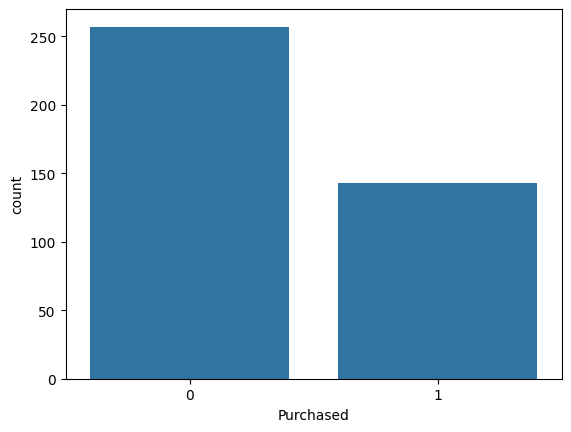

In [34]:
# Target label : 'Purchased'
sns.countplot(data = data, x = 'Purchased');

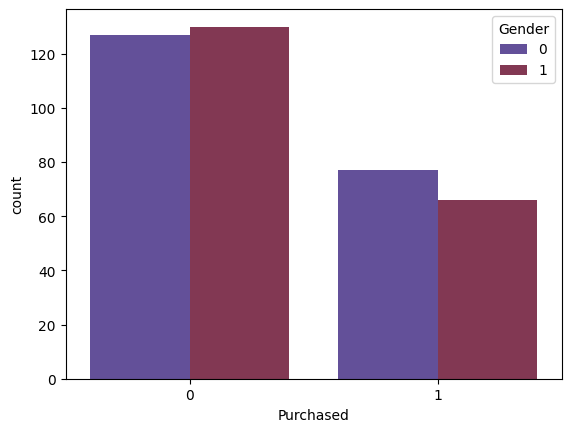

In [35]:
sns.countplot(data = data, x = 'Purchased', hue='Gender',palette="twilight");

<Axes: >

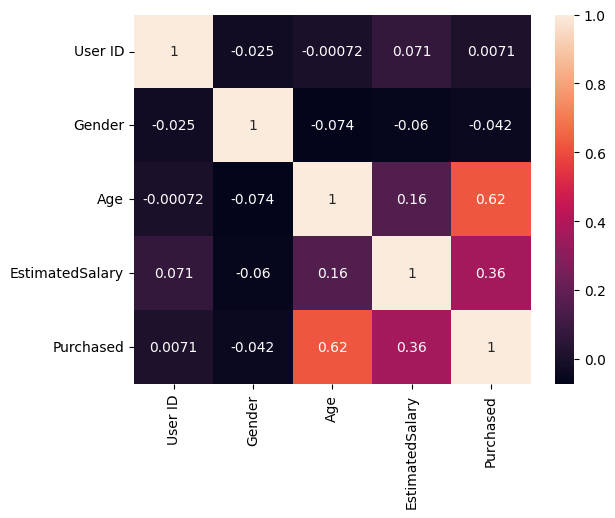

In [36]:
sns.heatmap(data.corr(),annot=True)

In [37]:
x=data[['Age','EstimatedSalary']]
y=data['Purchased']

In [38]:
scaler=StandardScaler()

In [39]:
x=scaler.fit_transform(x)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred=model.predict(x_test)

In [43]:
y_pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [44]:
y_test[:5]

209    0
280    1
33     0
210    1
93     0
Name: Purchased, dtype: int64

In [45]:
conf_mat=confusion_matrix(y_test,y_pred)

<Axes: >

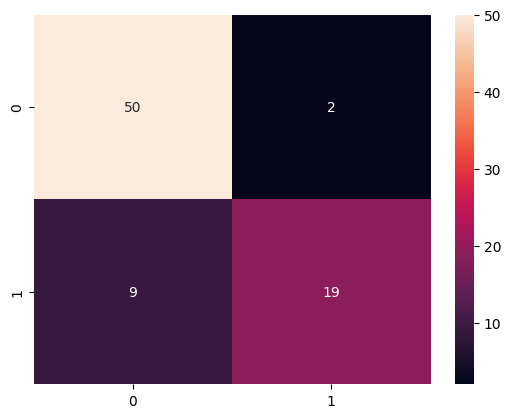

In [46]:
sns.heatmap(conf_mat,annot=True)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [48]:
TP=conf_mat[1,1]
FP=conf_mat[0,1]
TN=conf_mat[0,0]
FN=conf_mat[1,0]

accuracy=(TP+TN)/(TP+FP+TN+FN)
error_rate=(FP+FN)/(TP+FP+TN+FN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8625
Error Rate: 0.1375
Precision: 0.9047619047619048
Recall: 0.6785714285714286


<Axes: xlabel='Purchased'>

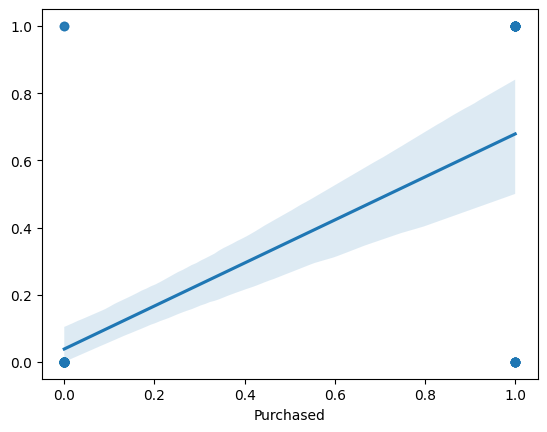

In [50]:
sns.regplot(x=y_test,y=y_pred)

In [51]:
print(TP)

19
